<a href="https://colab.research.google.com/github/AchmadHammam/Mesin-Learning/blob/main/Week%206/Cluster%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as s
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import  StandardScaler

In [3]:
dfw=pd.read_csv('/content/CC GENERAL.csv')
dfw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
dfw.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
dfw.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

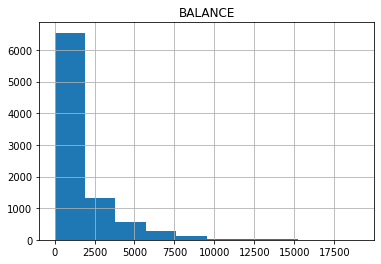

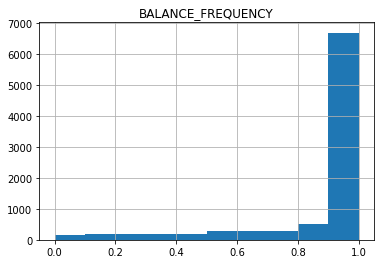

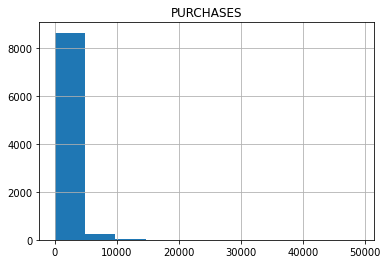

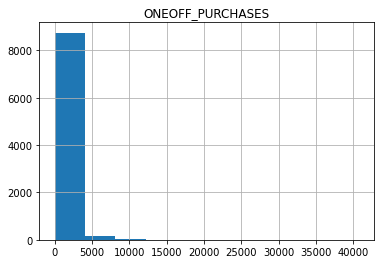

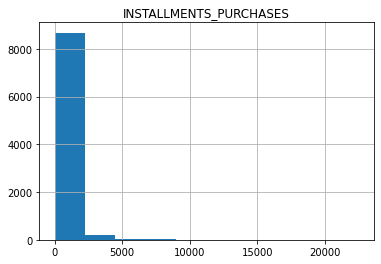

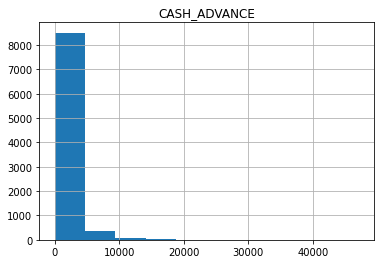

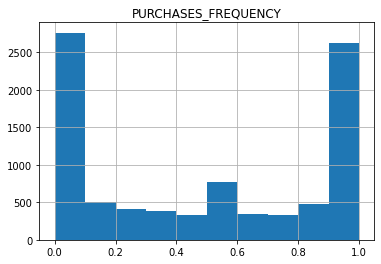

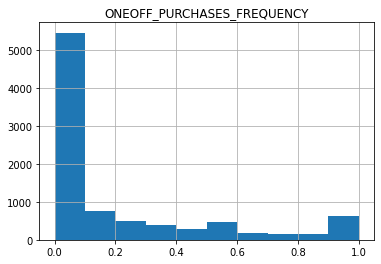

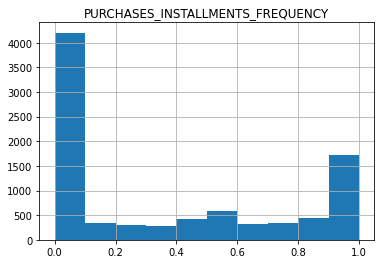

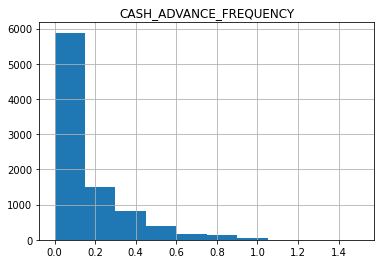

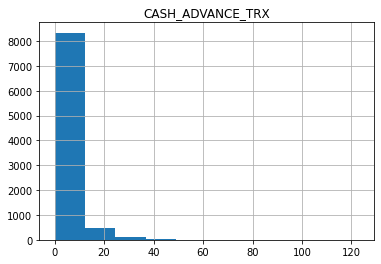

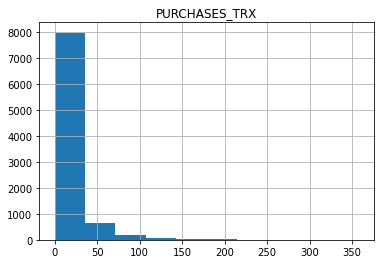

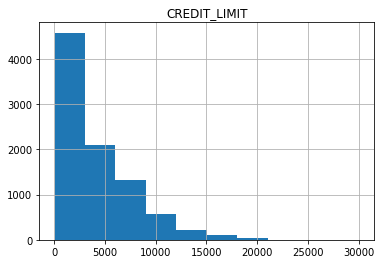

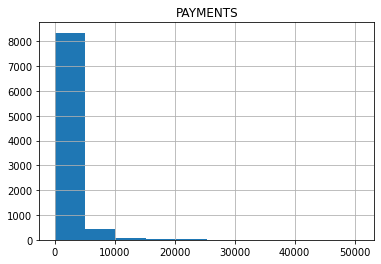

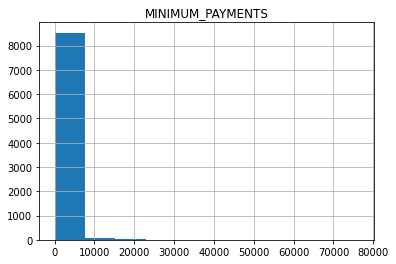

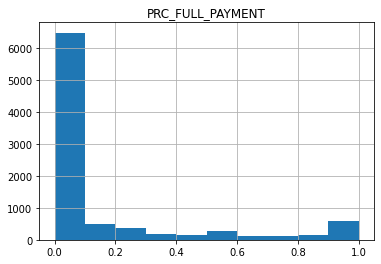

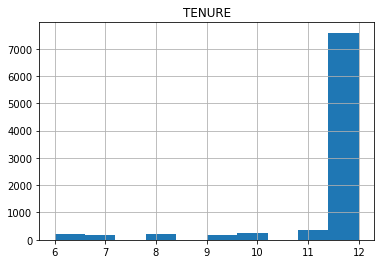

In [7]:
dfh = dfw.copy()
dfh.drop(columns=['CUST_ID'] , axis=1 , inplace=True)

for col in dfh:
    dfh[[col]].hist()

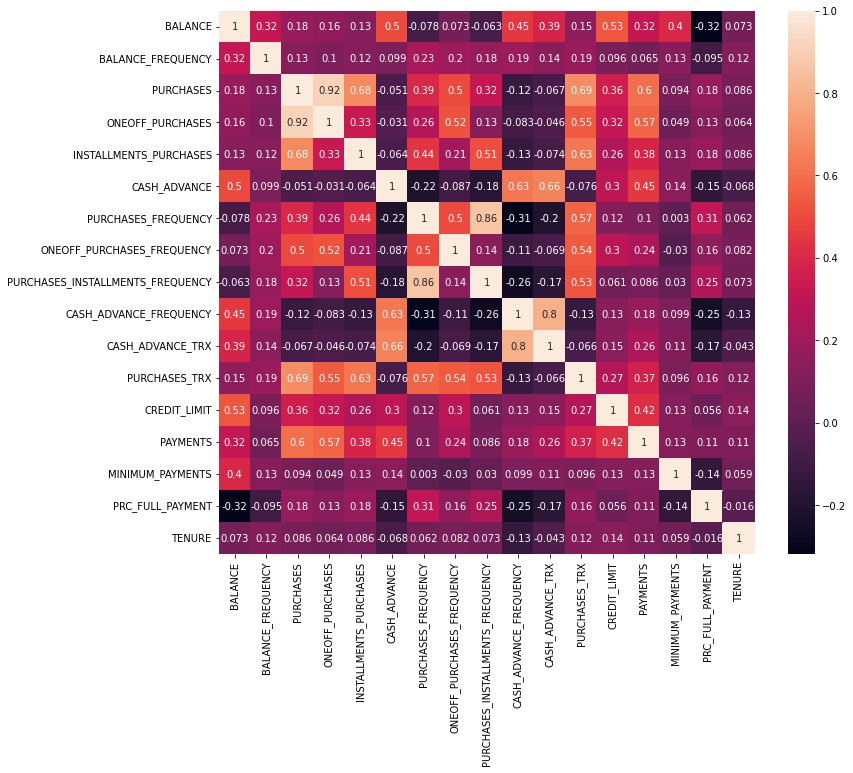

In [8]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(dfw.corr() , annot=True)

In [9]:
dfh.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
dfh.loc[(dfh['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=dfh['MINIMUM_PAYMENTS'].mean()
dfh.loc[(dfh['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=dfh['CREDIT_LIMIT'].mean()
dfh.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

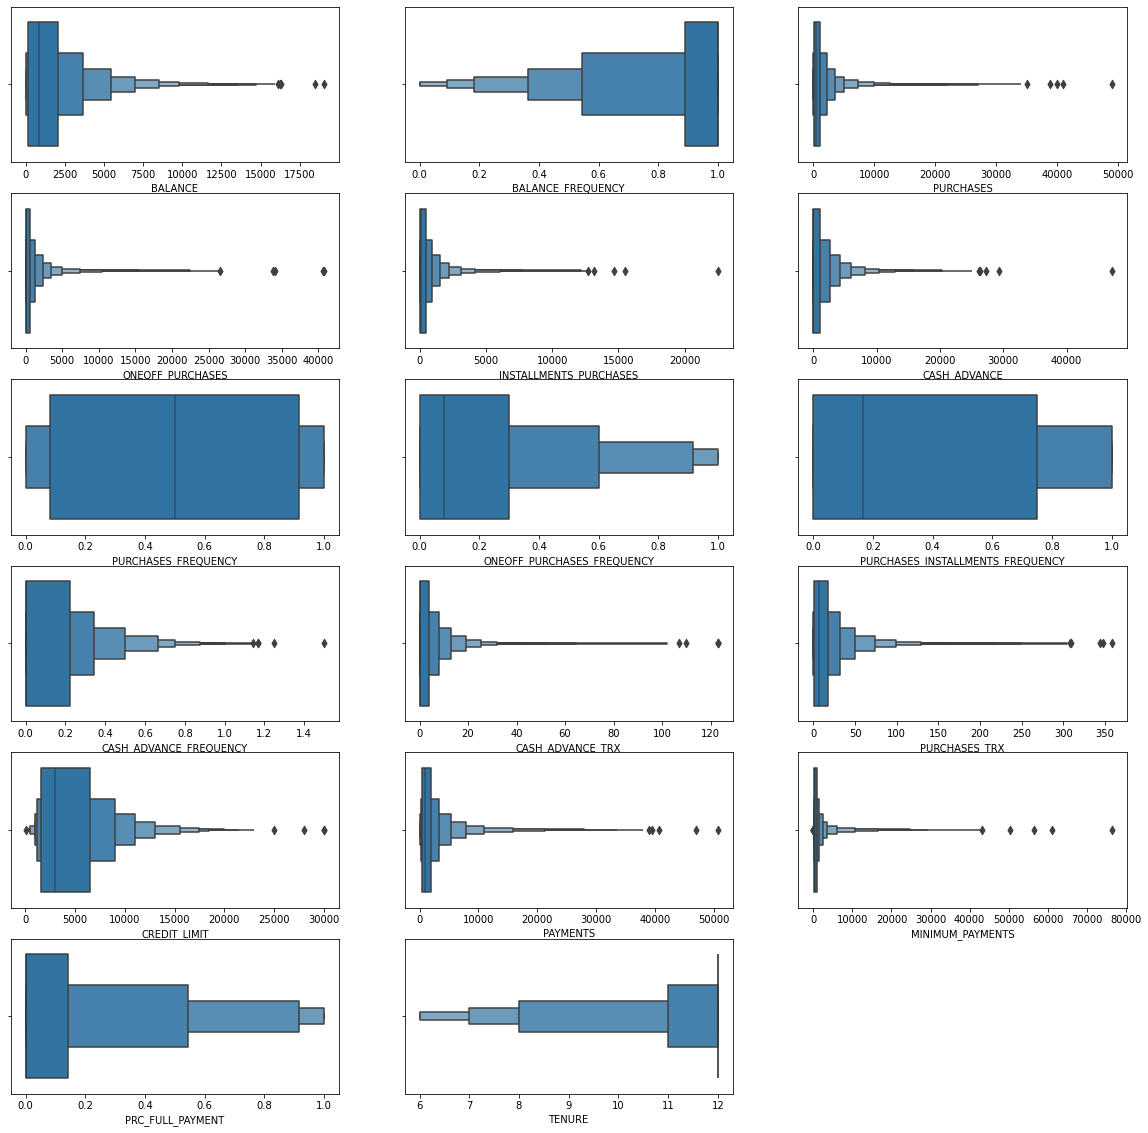

In [19]:
fig=plt.figure(figsize=(20,20))
for col in range(len(dfh.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxenplot(x=dfh.iloc[ : ,col])
plt.show()

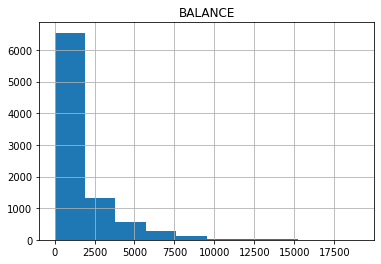

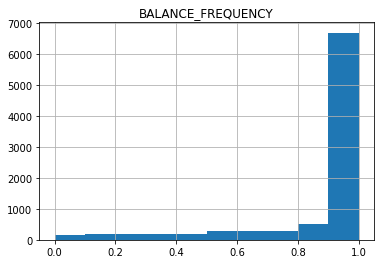

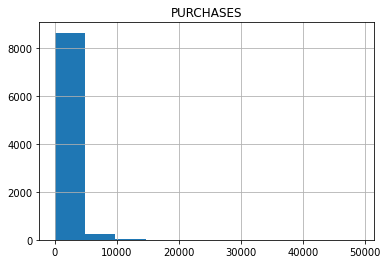

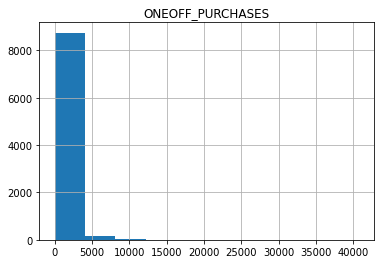

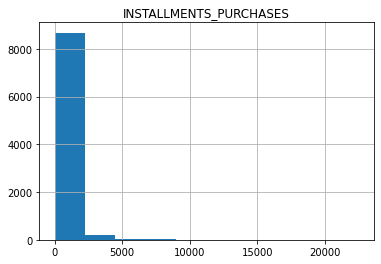

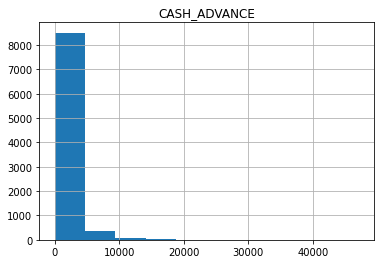

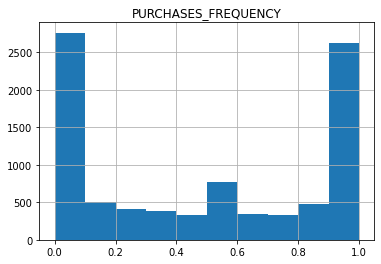

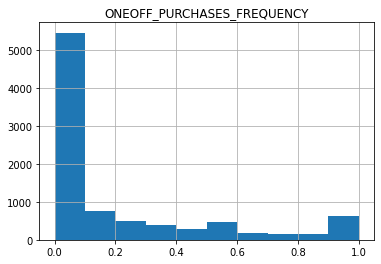

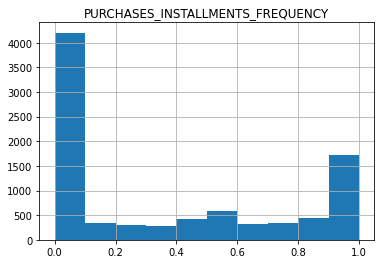

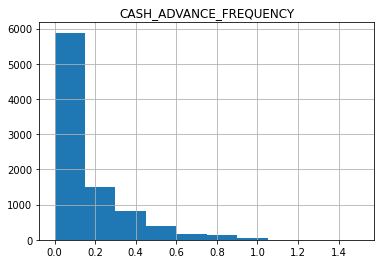

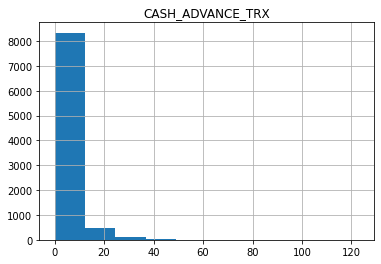

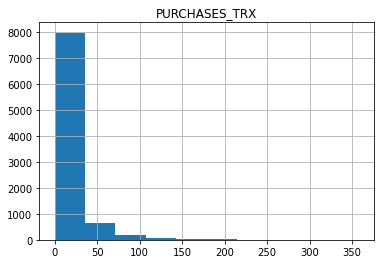

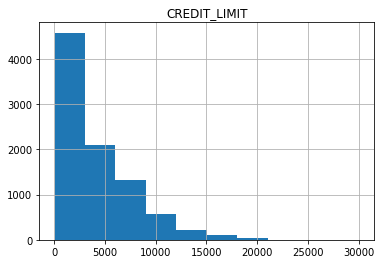

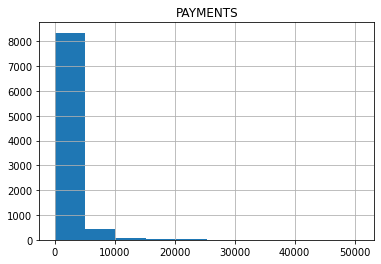

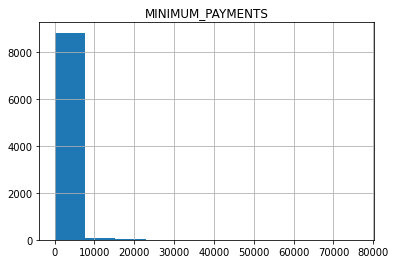

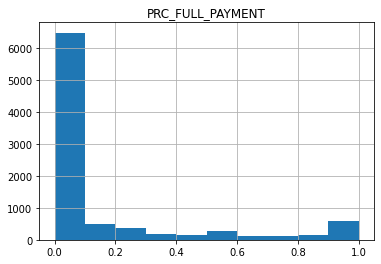

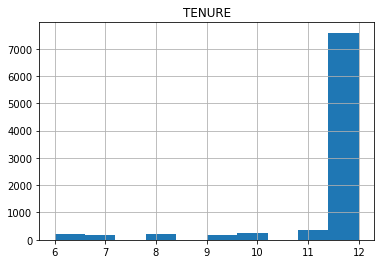

In [20]:
for col in dfh :
  dfh[[col]].hist()

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(dfh)

In [27]:
dfn = pd.DataFrame(X_scaled)

In [28]:
from sklearn import  preprocessing

In [29]:
dfn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


In [30]:
dfn.columns

RangeIndex(start=0, stop=17, step=1)

In [31]:
dfn.columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [32]:
dfn.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,0.026413,0.041089,0.148396,0.034170,0.011310,0.153715,0.919553
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,0.055485,0.069435,0.121490,0.057078,0.030503,0.292499,0.223055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007556,0.002236,0.000000,1.000000
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.016894,0.004392,0.000000,1.000000
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.215359,0.037482,0.011310,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


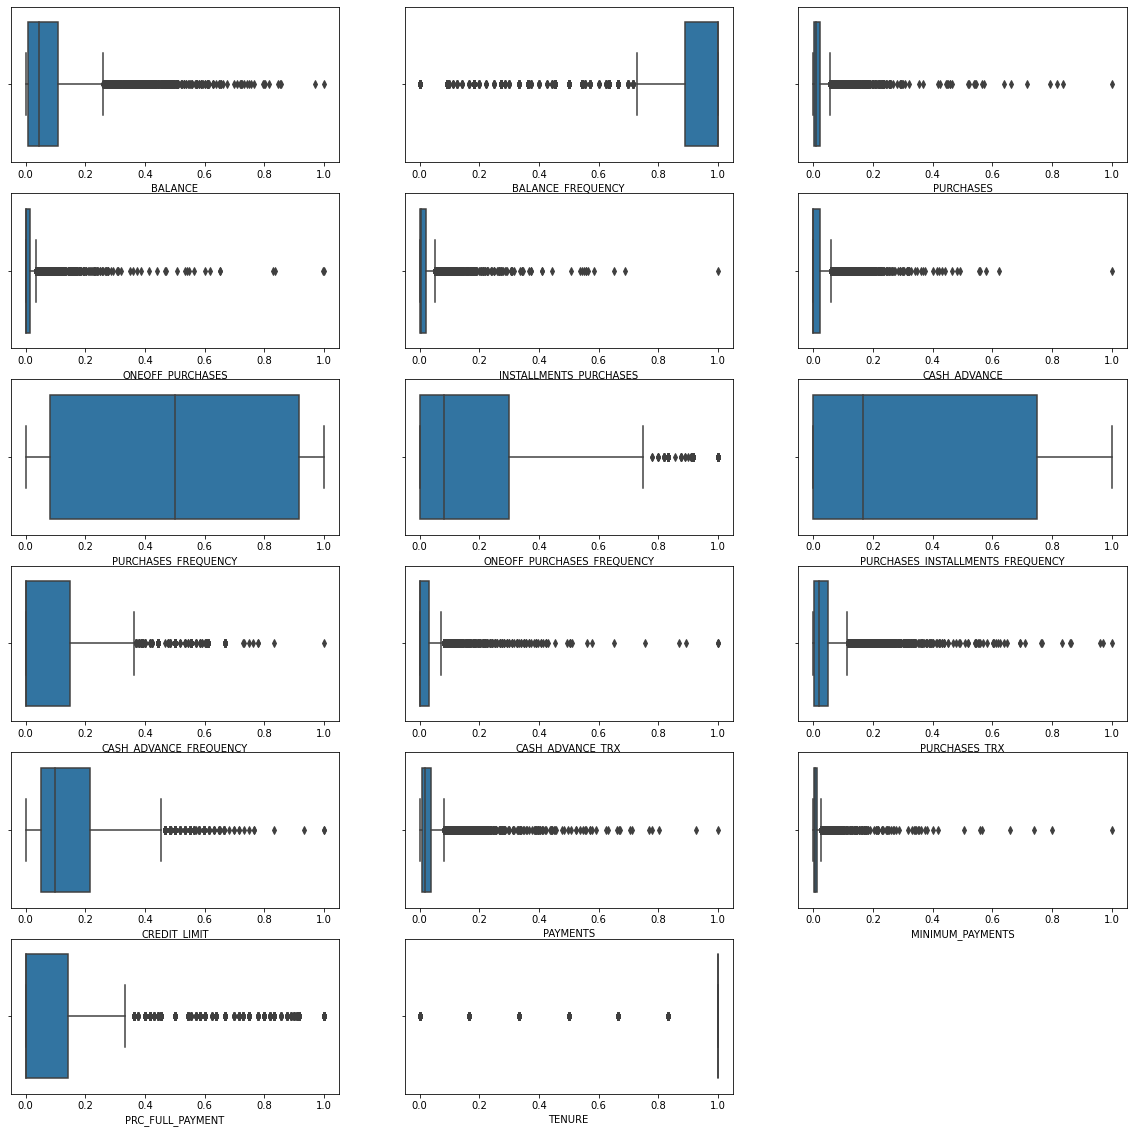

In [33]:
fig = plt.figure(figsize=(20,20))
for col in range(len(dfn.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=dfn.iloc[ : , col])
plt.show()

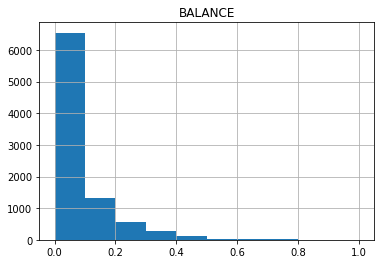

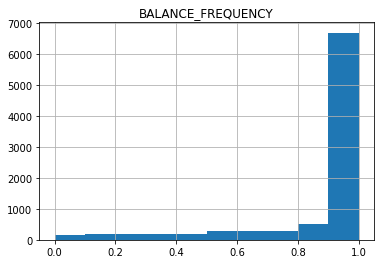

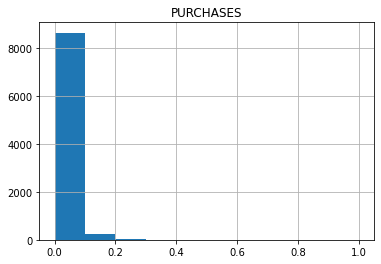

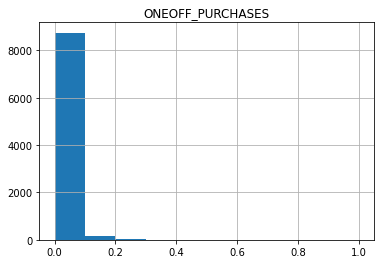

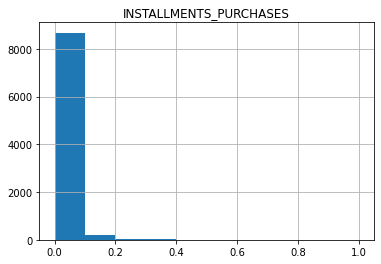

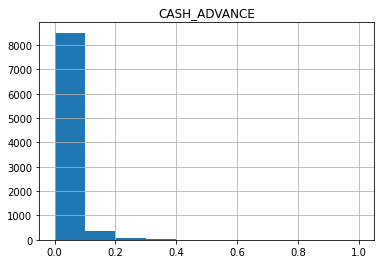

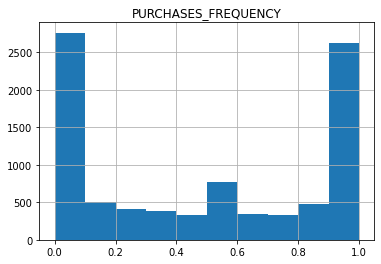

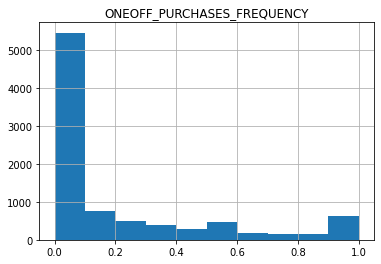

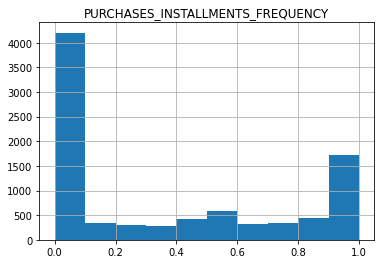

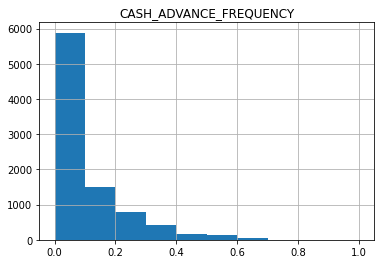

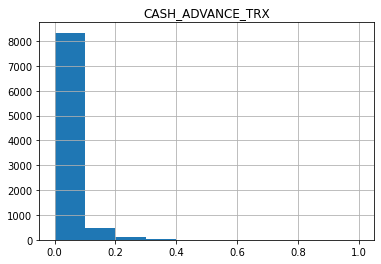

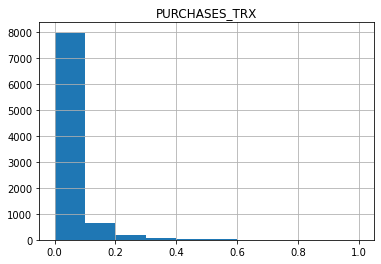

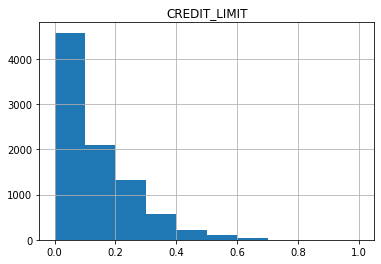

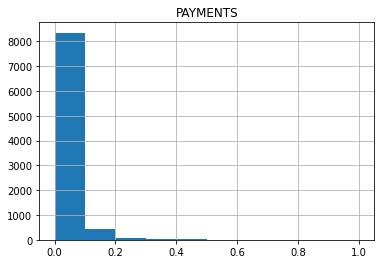

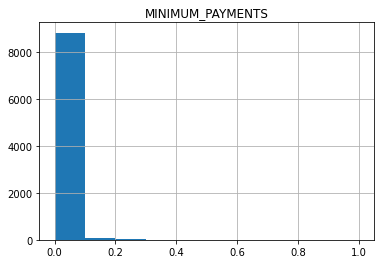

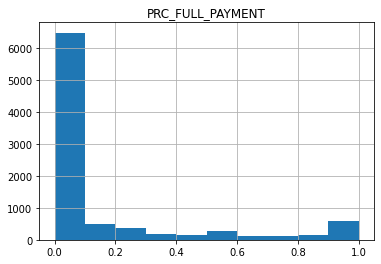

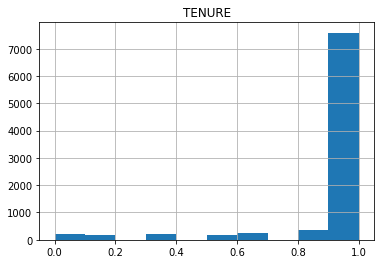

In [34]:
for col in dfn:
    dfn[[col]].hist()

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dfn)
dfc = pca.transform(dfn)

In [36]:
dfc.shape

(8950, 2)

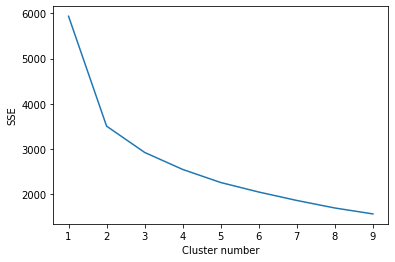

In [44]:
from sklearn.cluster import KMeans
sse= {}
for k in range (1,10) :
   kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dfn)
   sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Cluster number")
plt.ylabel("SSE")
plt.show()

In [45]:
wcss= []
range_values =range (1,20)
for i in range_values:
  kmeans =KMeans(n_clusters=i)
  kmeans.fit(dfc)
  wcss.append(kmeans.inertia_)

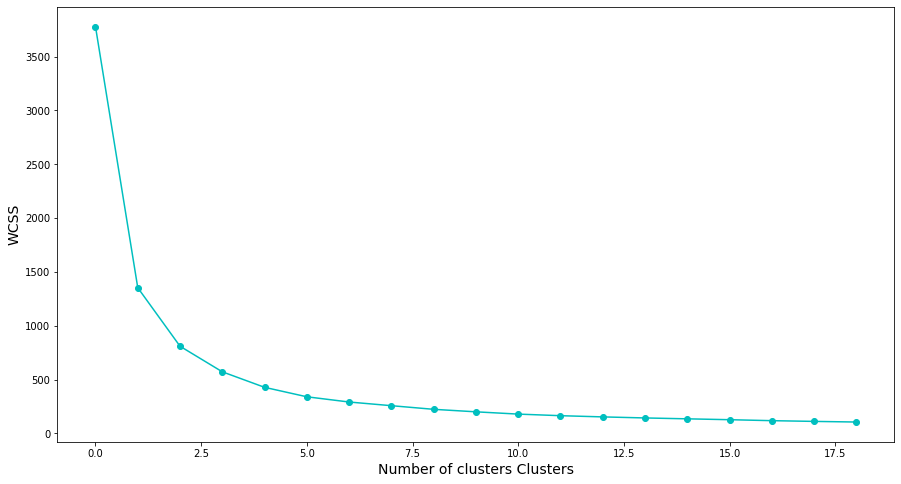

In [46]:
plt.figure(figsize=(15,8)) 
plt.plot(wcss, 'bo-', color='c')
plt.xlabel('Number of clusters Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14);

In [47]:
kmeans =  KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(dfc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

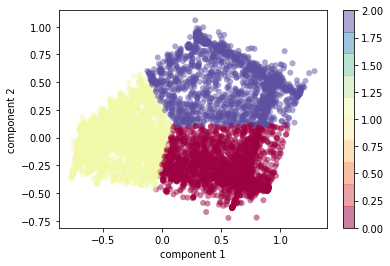

In [48]:
plt.scatter(dfc[:, 0], dfc[:, 1],
            c= kmeans.labels_.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [49]:
dfn["cluster"] = kmeans.labels_.astype(float)

In [50]:
dfn

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,2.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,1.0


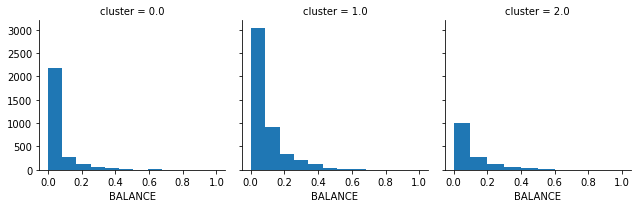

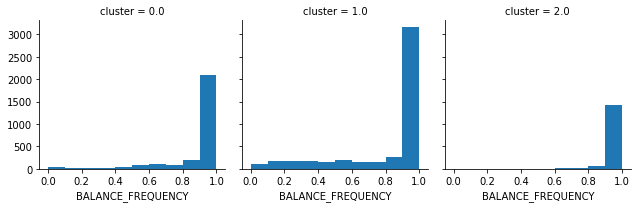

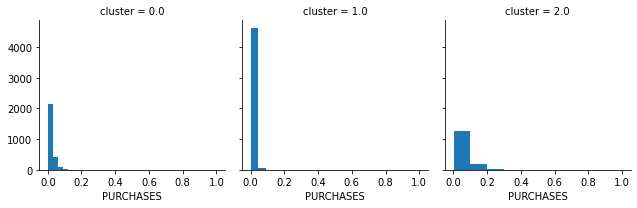

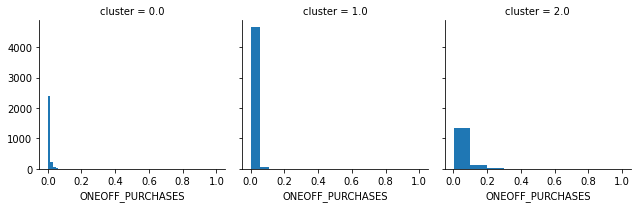

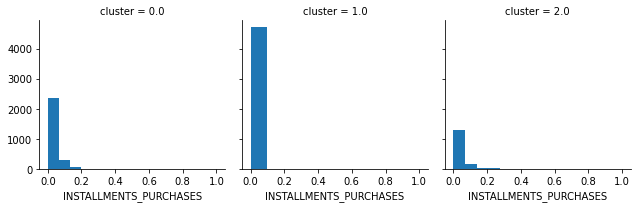

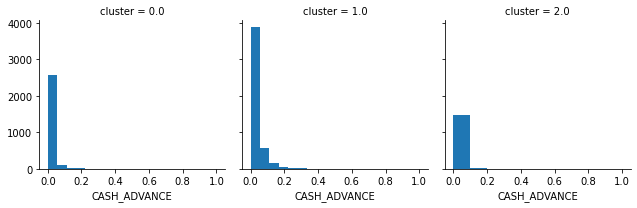

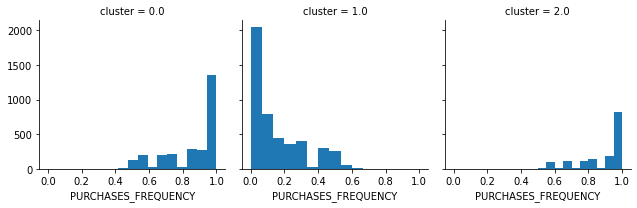

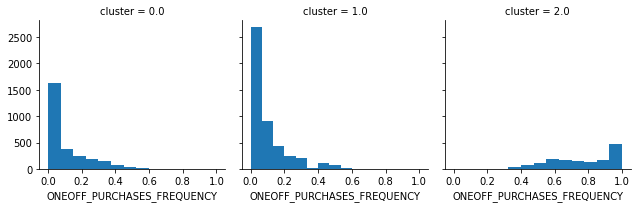

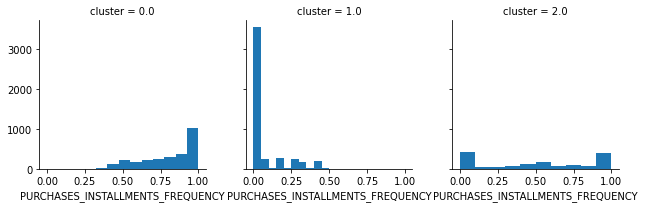

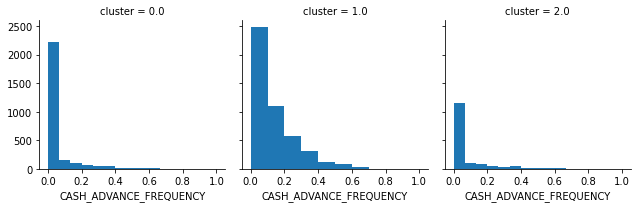

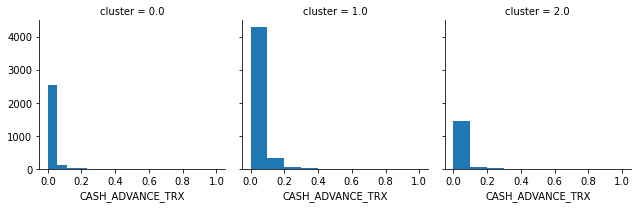

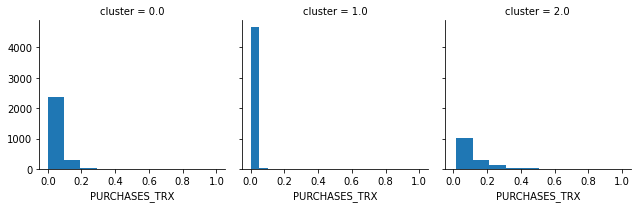

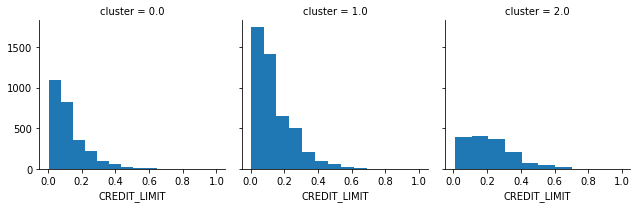

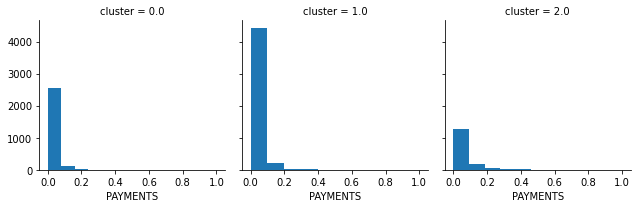

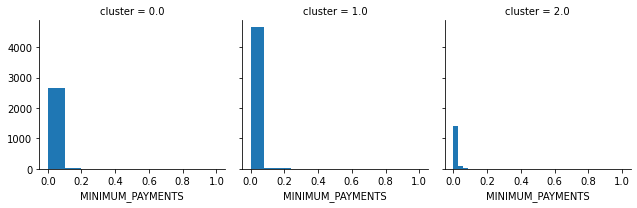

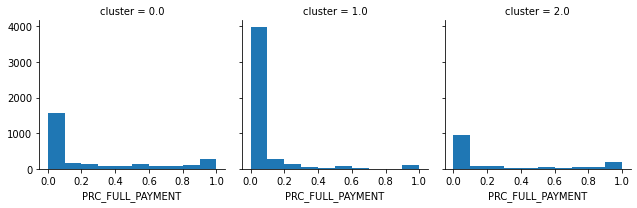

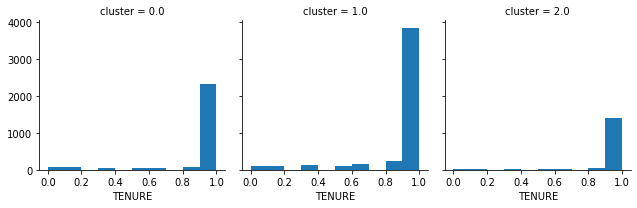

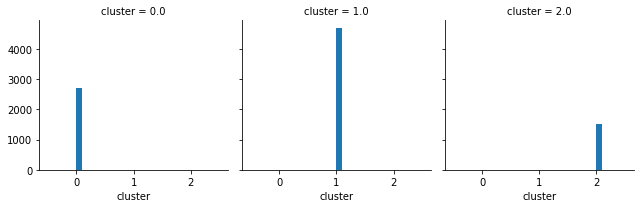

In [51]:
for c in dfn:
    grid= sns.FacetGrid(dfn, col='cluster')
    grid.map(plt.hist, c)   

In [52]:
dfc

array([[-0.48216436, -0.09765617],
       [-0.6085774 , -0.01937946],
       [ 0.30450697,  0.92094554],
       ...,
       [ 0.36038865, -0.42264684],
       [-0.64609505, -0.20433243],
       [-0.09459773,  0.39957787]])

In [53]:
pca = PCA(n_components=2)
pca.fit(dfn)
dfd = pca.transform(dfn)

In [54]:
from sklearn.cluster import DBSCAN

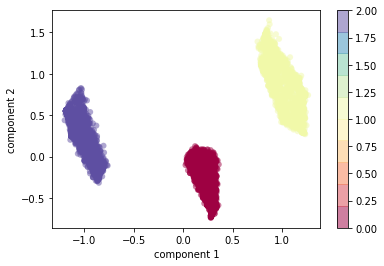

In [55]:
db = DBSCAN(eps=0.5, min_samples=10).fit(dfd)
labels = db.labels_
plt.scatter(dfd[:, 0], dfd[:, 1],
            c= labels.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [56]:
dfn["clusterDBSCAN"] = labels.astype(float)
dfn

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,clusterDBSCAN
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,1.0,0.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,1.0,0.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,2.0,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0,1.0,0.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,0.0,2.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0,0.0,2.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,0.0,2.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,1.0,0.0


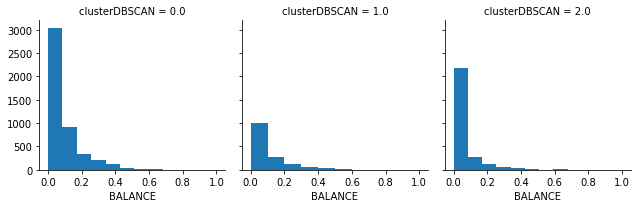

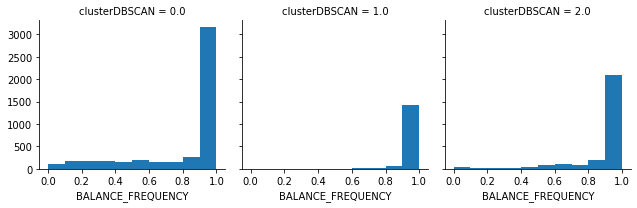

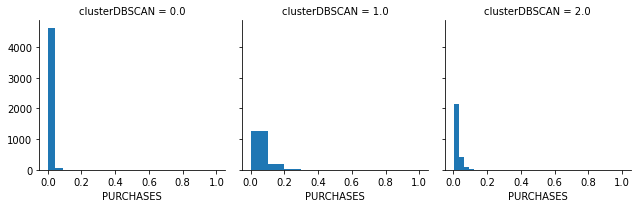

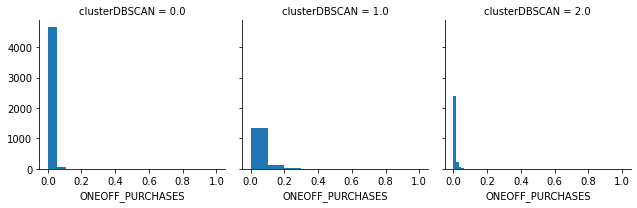

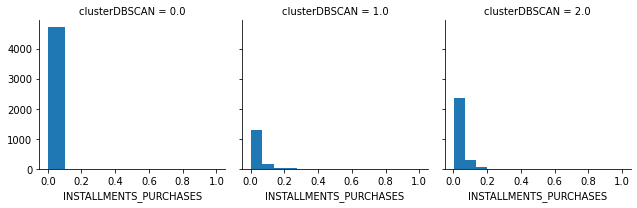

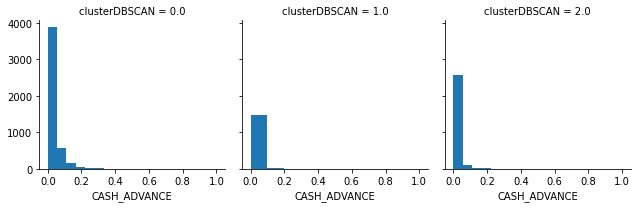

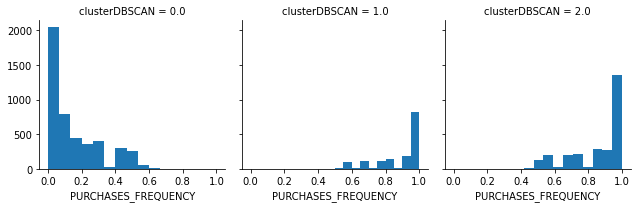

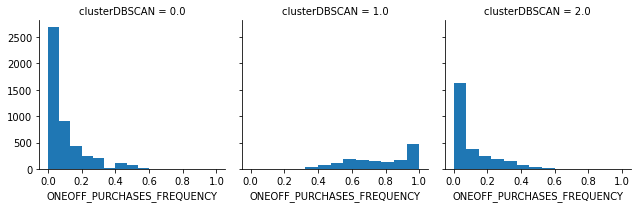

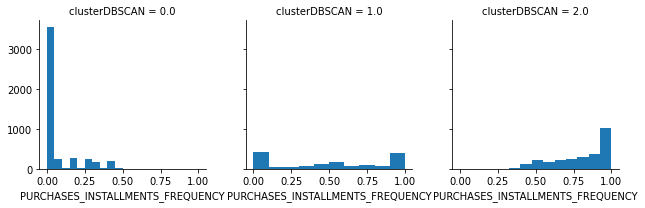

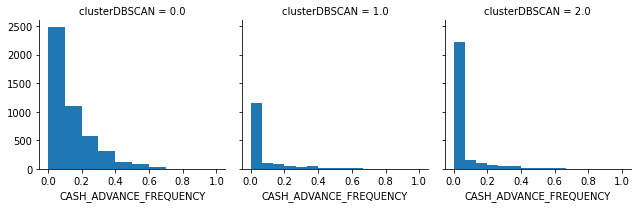

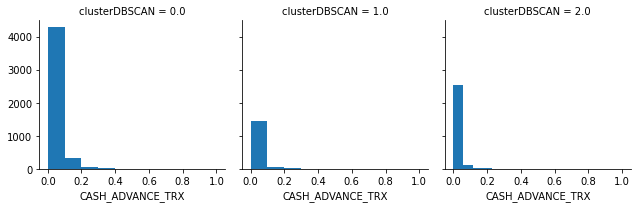

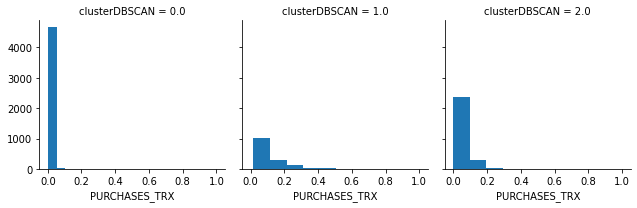

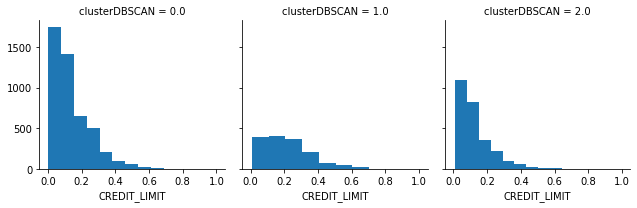

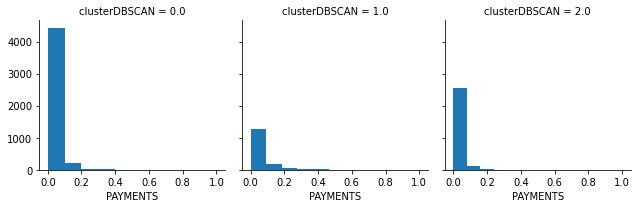

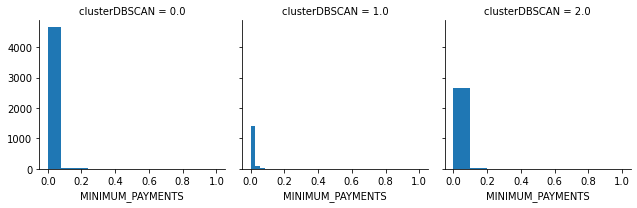

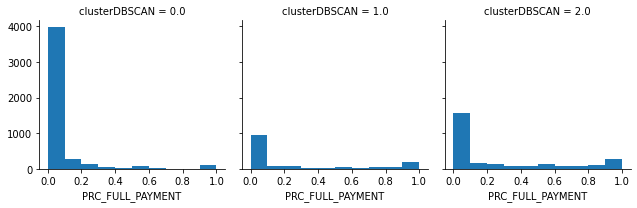

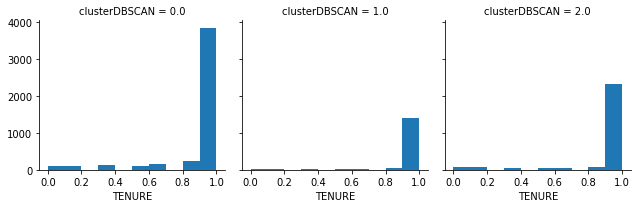

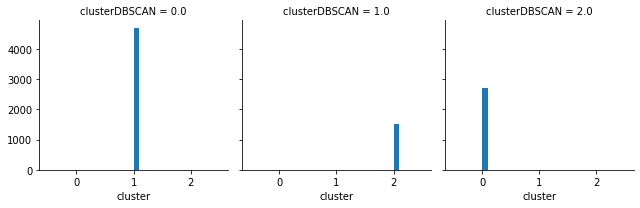

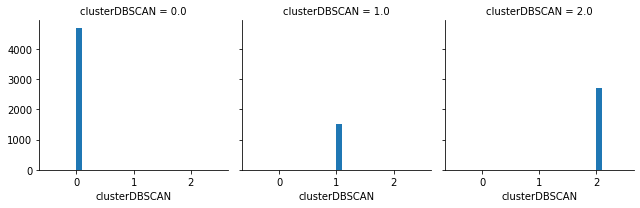

In [57]:
for c in dfn:
    grid= sns.FacetGrid(dfn, col='clusterDBSCAN')
    grid.map(plt.hist, c) 

In [58]:
dff = dfn.groupby("cluster")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
dff.describe(include="all")

BALANCE                                                         \
          count      mean       std  min       25%       50%       75%   
cluster                                                                  
0.0      2716.0  0.055456  0.091453  0.0  0.002796  0.014634  0.068596   
1.0      4706.0  0.089997  0.108141  0.0  0.010854  0.057033  0.120455   
2.0      1528.0  0.105454  0.130829  0.0  0.016670  0.055525  0.142739   

                  BALANCE_FREQUENCY                                          \
              max             count      mean       std  min       25%  50%   
cluster                                                                       
0.0      0.846268            2716.0  0.907174  0.196111  0.0  0.909091  1.0   
1.0      0.856208            4706.0  0.827464  0.276485  0.0  0.727273  1.0   
2.0      1.000000            1528.0  0.977515  0.075508  0.0  1.000000  1.0   

                  PURCHASES                                                    \
         75%  max     count      mean       std       min       25%       50%   
cluster                                                                         
0.0      1.0  1.0    2716.0  0.020768  0.024144  0.000245  0.006625  0.012485   
1.0      1.0  1.0    4706.0  0.006029  0.016831  0.000000  0.000000  0.001083   
2.0      1.0  1.0    1528.0  0.064340  0.081529  0.000171  0.022902  0.043032   

                            ONEOFF_PURCHASES                                \
              75%       max            count      mean       std       min   
cluster                                                                      
0.0      0.025857  0.299474           2716.0  0.005815  0.013474  0.000000   
1.0      0.006512  0.458813           4706.0  0.005746  0.017530  0.000000   
2.0      0.076106  1.000000           1528.0  0.057100  0.079137  0.000206   

                                               INSTALLMENTS_PURCHASES  \
             25%       50%       75%       max                  count   
cluster                                                                 
0.0      0.00000  0.000000  0.005397  0.155678                 2716.0   
1.0      0.00000  0.000000  0.005130  0.542225                 4706.0   
2.0      0.01981  0.035903  0.064937  1.000000                 1528.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
cluster                                                                         
0.0      0.034764  0.040566  0.000533  0.012298  0.022191  0.042983  0.652716   
1.0      0.002737  0.018188  0.000000  0.000000  0.000000  0.000000  1.000000   
2.0      0.036790  0.062862  0.000000  0.001017  0.017096  0.046170  0.688764   

        CASH_ADVANCE                                                    \
               count      mean       std  min  25%       50%       75%   
cluster                                                                  
0.0           2716.0  0.010018  0.030707  0.0  0.0  0.000000  0.000791   
1.0           4706.0  0.028745  0.047928  0.0  0.0  0.008256  0.038705   
2.0           1528.0  0.015297  0.049136  0.0  0.0  0.000000  0.007944   

                  PURCHASES_FREQUENCY                                          \
              max               count      mean       std       min       25%   
cluster                                                                         
0.0      0.557282              2716.0  0.867131  0.165728  0.416667  0.750000   
1.0      0.555698              4706.0  0.142170  0.167562  0.000000  0.000000   
2.0      1.000000              1528.0  0.892971  0.142994  0.500000  0.833333   

                                  ONEOFF_PURCHASES_FREQUENCY            \
              50%   75%       max                      count      mean   
cluster                                                                  
0.0      0.916667  1.00  1.000000                   

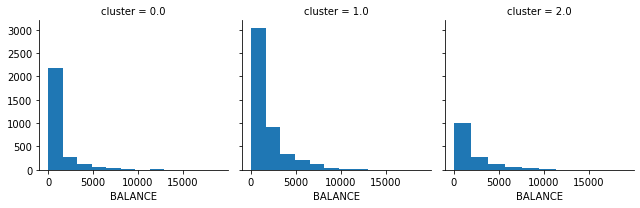

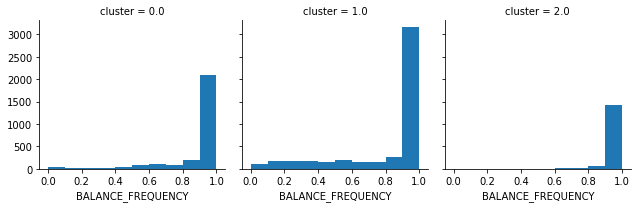

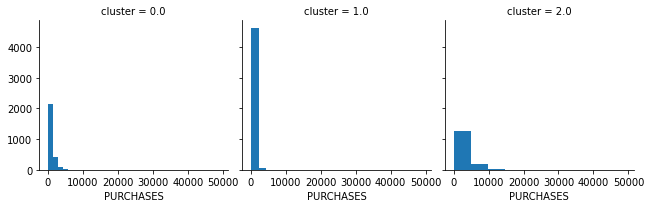

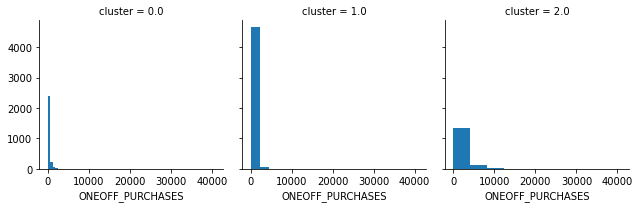

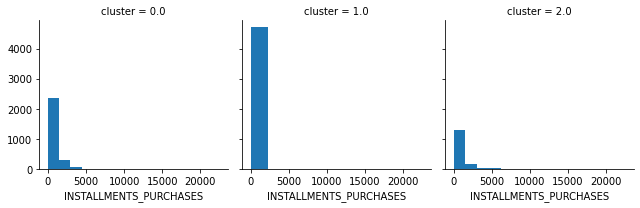

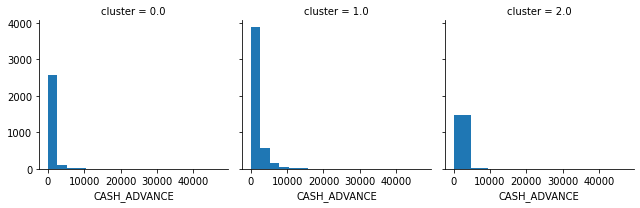

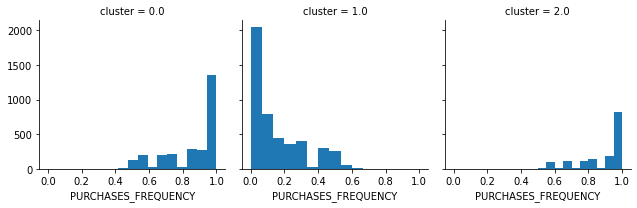

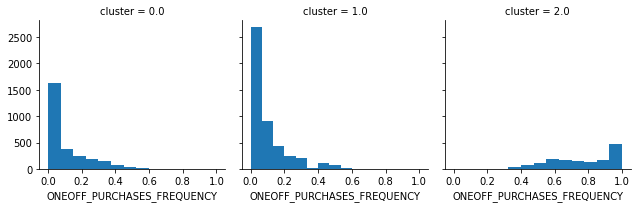

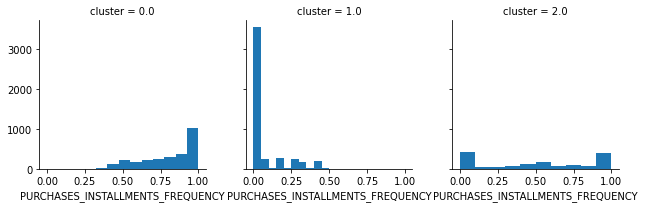

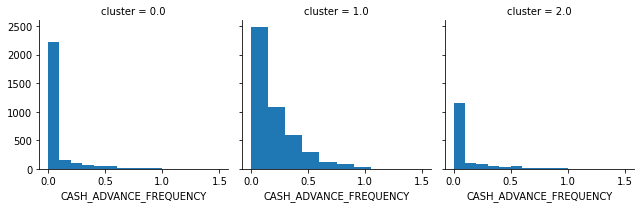

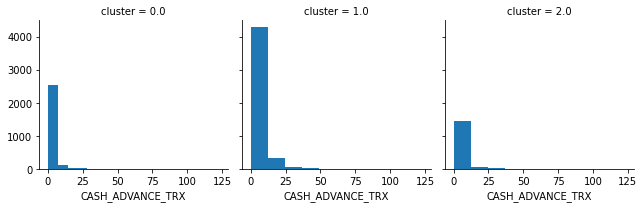

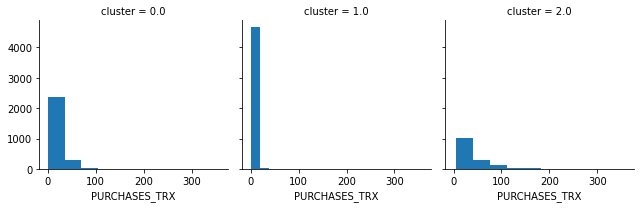

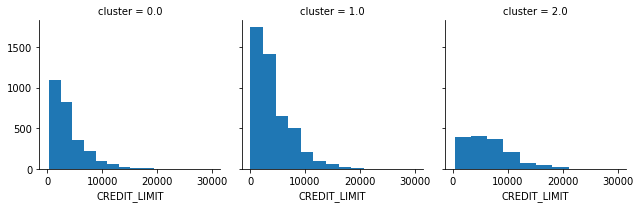

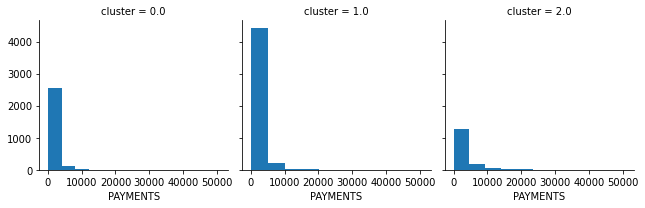

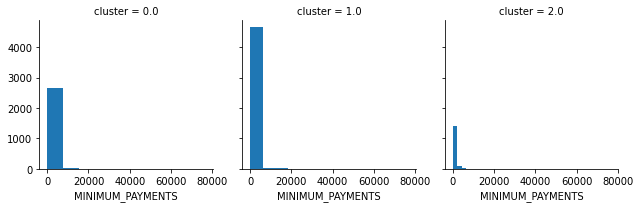

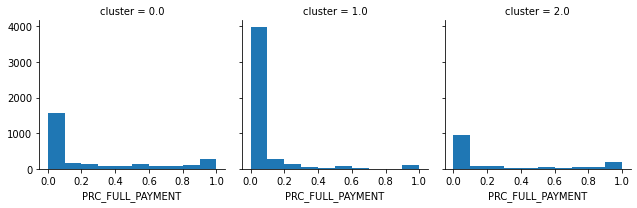

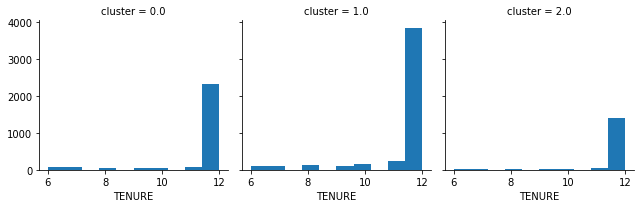

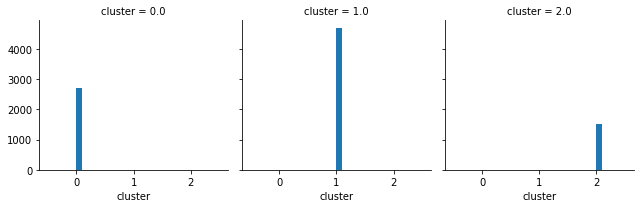

In [60]:
dfh["cluster"] = kmeans.labels_.astype(float)
dfhh = dfh.groupby("cluster")
dfh.describe()
for c in dfh:
    grid= sns.FacetGrid(dfh, col='cluster')
    grid.map(plt.hist, c)  

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_builder =DecisionTreeClassifier(max_depth = 3)
model = tree_builder.fit(dfh[['BALANCE',
'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY',
'PURCHASES_FREQUENCY',
'MINIMUM_PAYMENTS',
'CREDIT_LIMIT']], dfh["cluster"])

[Text(2790.0, 4756.5, 'PURCHASES_FREQUENCY <= 0.577\ngini = 0.602\nsamples = 8950\nvalue = [2716, 4706, 1528]\nclass = NORMAL'),
 Text(1395.0, 3397.5, 'PURCHASES_INSTALLMENTS_FREQUENCY <= 0.449\ngini = 0.071\nsamples = 4846\nvalue = [163, 4669, 14]\nclass = NORMAL'),
 Text(697.5, 2038.5, 'PURCHASES_INSTALLMENTS_FREQUENCY <= 0.369\ngini = 0.033\nsamples = 4739\nvalue = [67, 4659, 13]\nclass = NORMAL'),
 Text(348.75, 679.5, 'gini = 0.012\nsamples = 4496\nvalue = [16, 4470, 10]\nclass = NORMAL'),
 Text(1046.25, 679.5, 'gini = 0.351\nsamples = 243\nvalue = [51, 189, 3]\nclass = NORMAL'),
 Text(2092.5, 2038.5, 'BALANCE <= 0.719\ngini = 0.186\nsamples = 107\nvalue = [96, 10, 1]\nclass = NORMAL'),
 Text(1743.75, 679.5, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]\nclass = NORMAL'),
 Text(2441.25, 679.5, 'gini = 0.129\nsamples = 102\nvalue = [95, 6, 1]\nclass = NORMAL'),
 Text(4185.0, 3397.5, 'ONEOFF_PURCHASES_FREQUENCY <= 0.449\ngini = 0.477\nsamples = 4104\nvalue = [2553, 37, 1514]\nclass = 

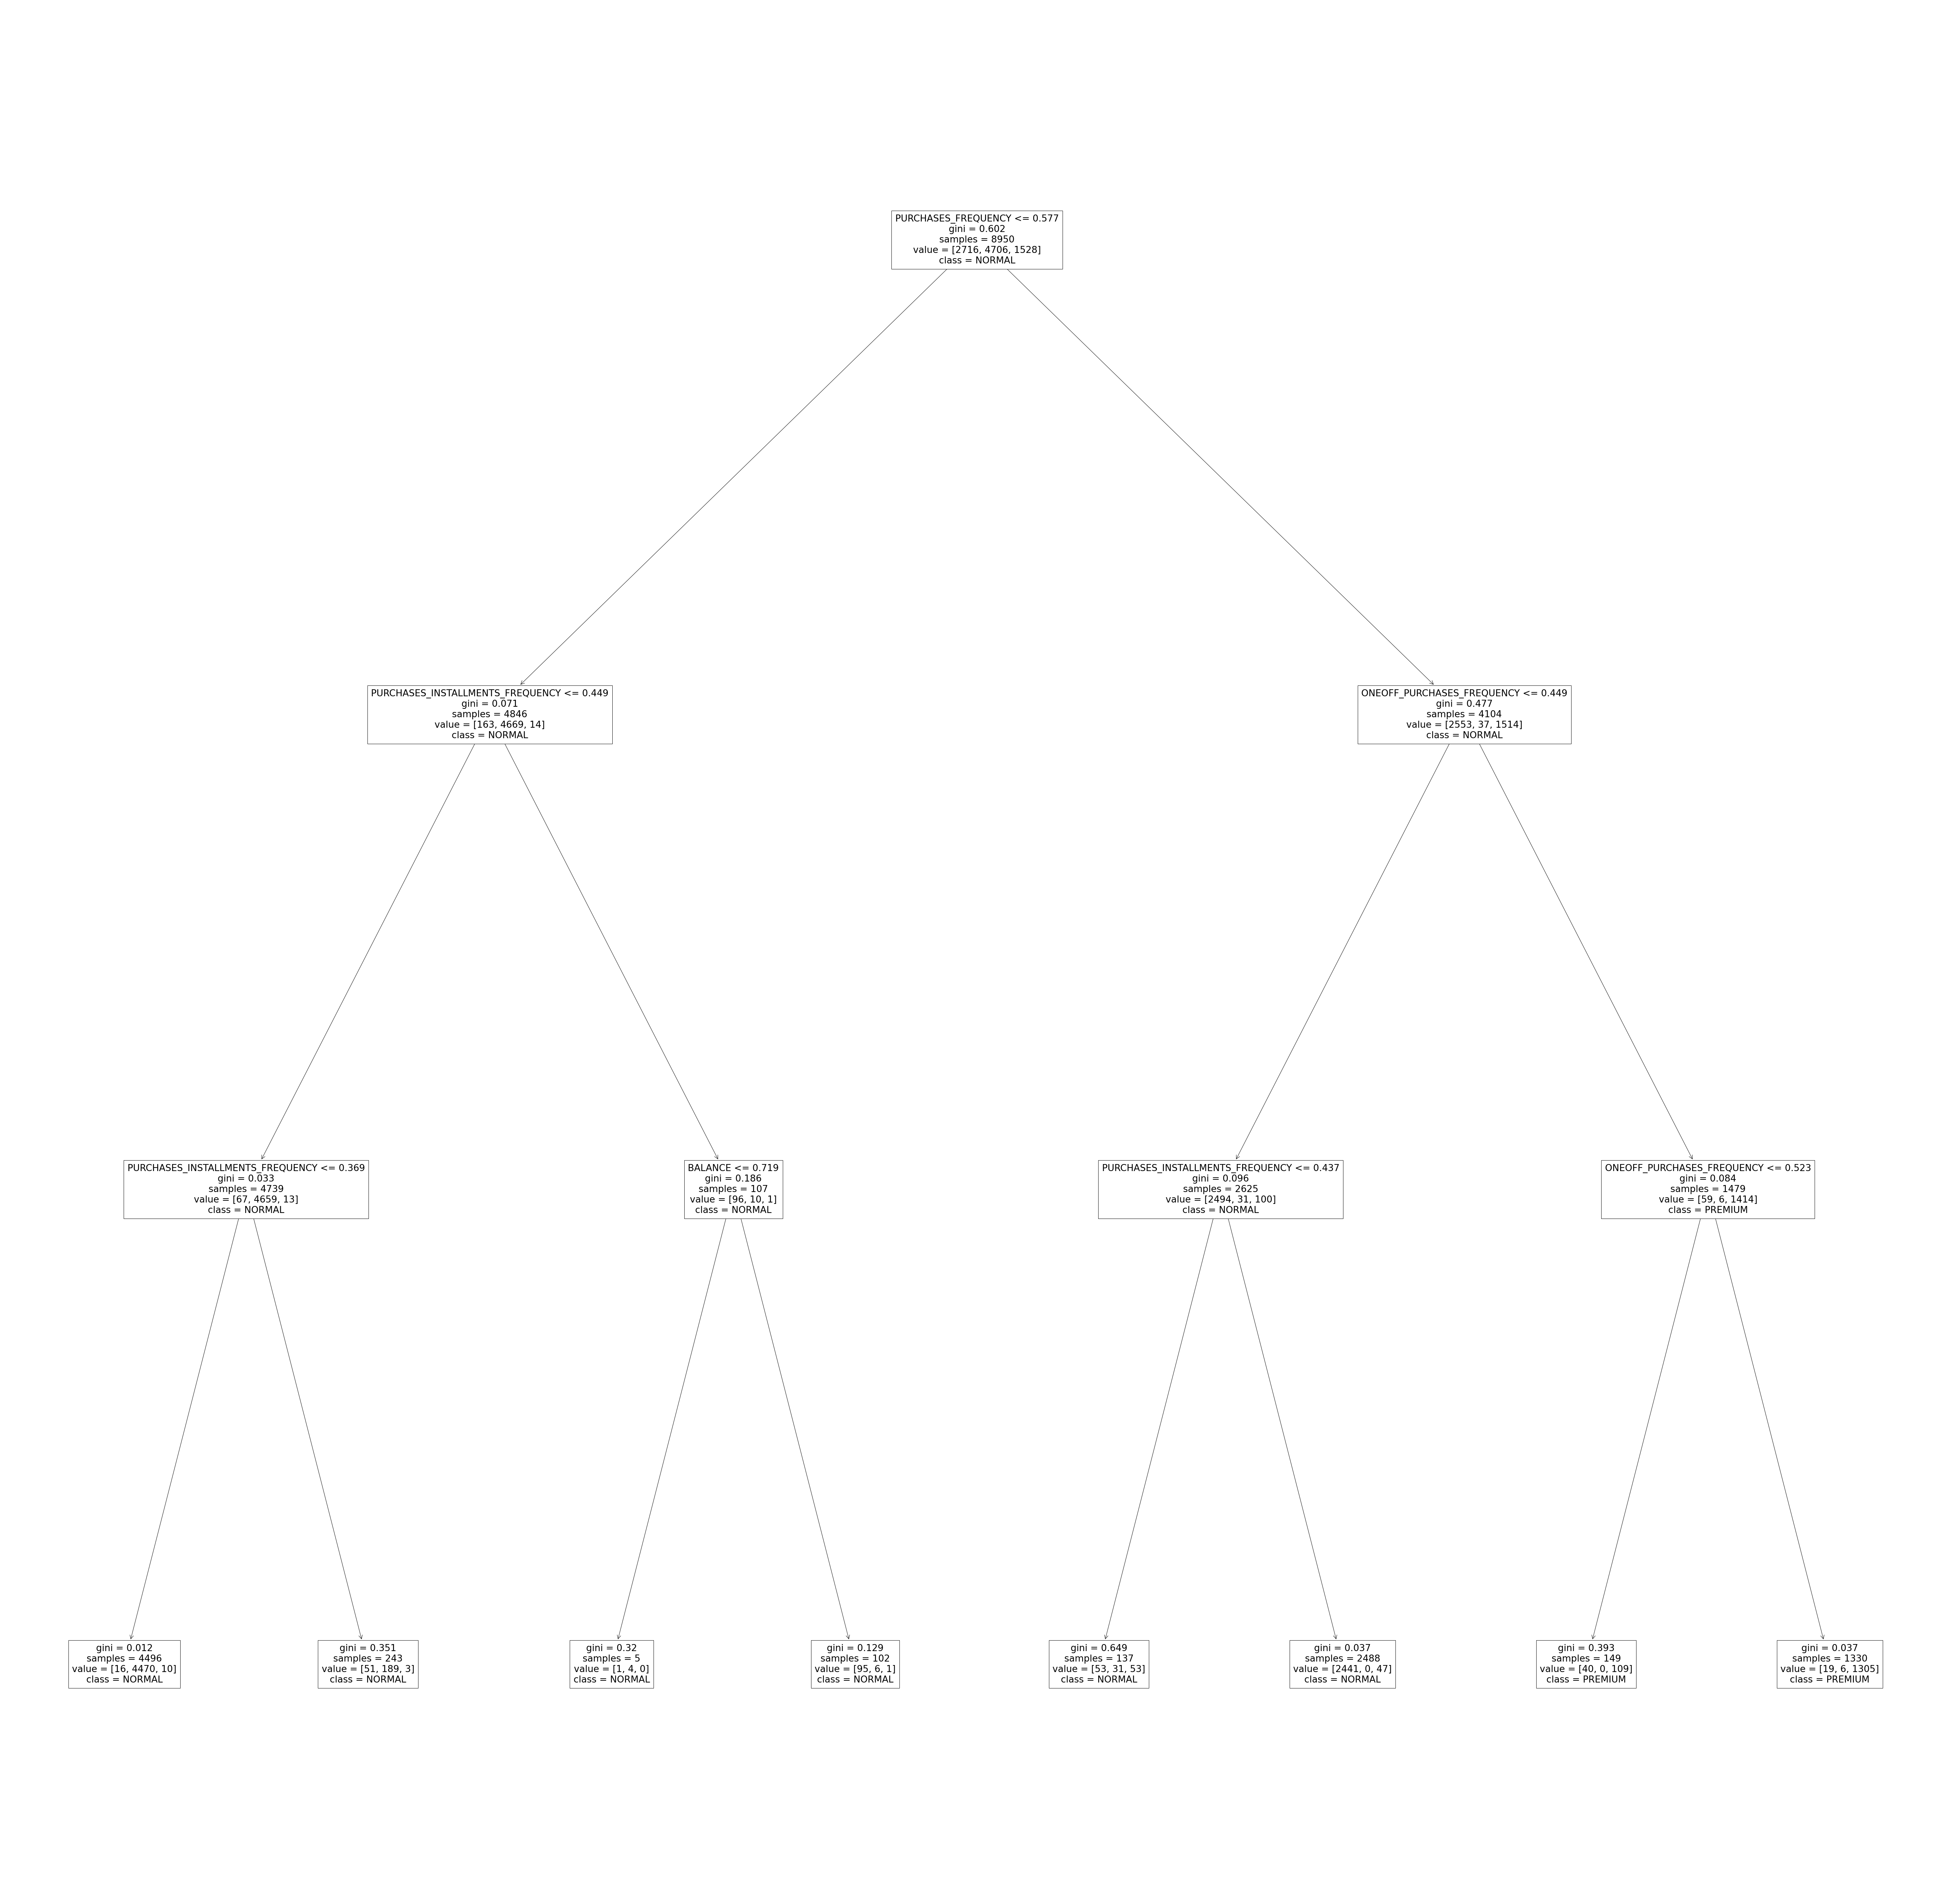

In [62]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model, feature_names=['BALANCE',
'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY',
'PURCHASES_FREQUENCY',
'MINIMUM_PAYMENTS',
"CREDIT_LIMIT"],
class_names = ['NORMAL', 'NORMAL', 'PREMIUM'],
)